# YearPredictionMSD Data Set
## Python for Data Analysis - Final Project
### CESAR Thomas, CHARRUEY Adrien - ESILV, A4, DIA 3

## Library Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

## Data Set Import
The data set can be downloaded here : https://archive.ics.uci.edu/ml/datasets/YearPredictionMSD

In [2]:
df = pd.read_csv(r'C:\Users\BgTxt\Documents\tamerelapute\YearPredictionMSD.txt',header=None)
#df = pd.read_csv(r'C:\Users\adrie\Documents\ESILV 2021-2022\S7\Python for data analysis S7\Final Project CESAR CHARRUEY\YearPredictionMSD.txt',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


## Data Preprocessing

In [3]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


We rename the first column of the dataframe

In [4]:
df.rename(columns={0:'year'}, inplace=True)

In [5]:
df.head()

,year,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


We check for null values :

In [6]:
df.isnull().sum().sum()

0

We can see that there are no null values in the dataframe. We can proceed to the exploratory analysis.
## Exploratory Data Analysis

C:\Users\BgTxt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


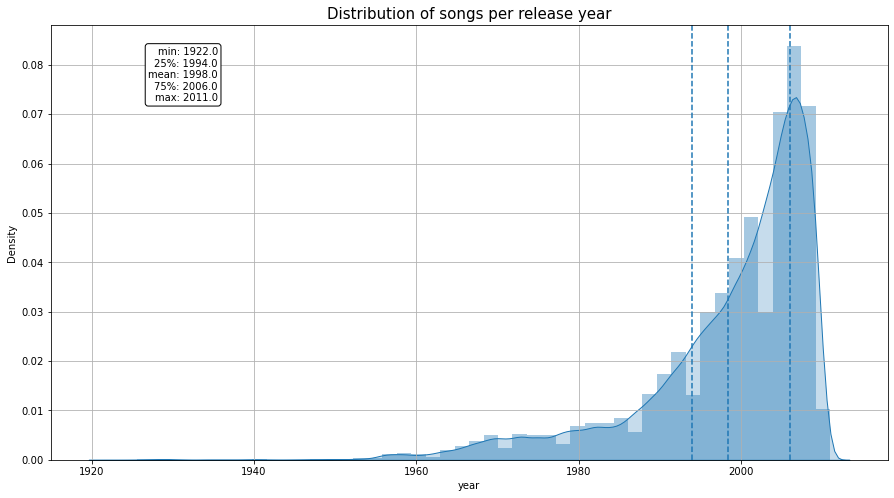

In [7]:
fig, ax = plt.subplots(figsize=(15,8))

ax.set_title('Distribution of songs per release year', fontsize=15)
variable = df['year']

sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax)
des = df['year'].describe()
ax.axvline(des["25%"], ls='--')
ax.axvline(des["mean"], ls='--')
ax.axvline(des["75%"], ls='--')
ax.grid(True)

des = round(des).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax.text(0.20, 0.95, box, transform=ax.transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1));

We can see that there is a peak in the year 2000s. Unbalanced data like that could result in our models to predict only release years around the year 2000s. We might have to use downsampling to solve this problem.

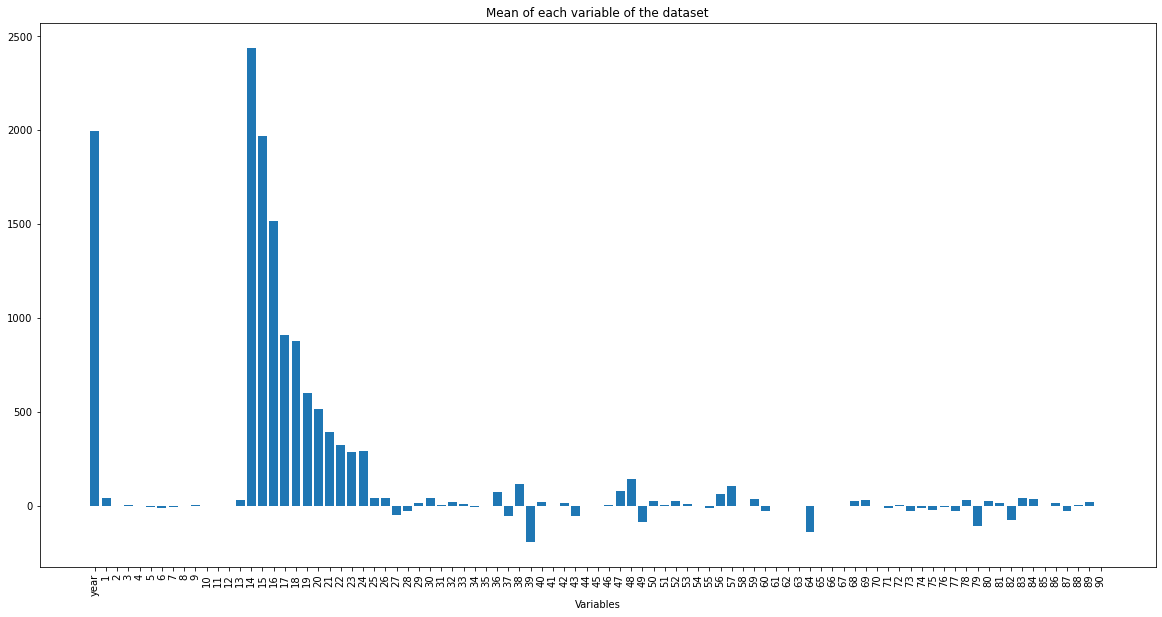

In [8]:
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(df.columns.map(str), df.mean().values)
ax.set_xlabel('Variables')
plt.xticks(rotation = 90)
plt.title('Mean of each variable of the dataset');

The year and variables from 14 to 24 have much greater means than the other variables. We will have to scale the data before using it for our models.

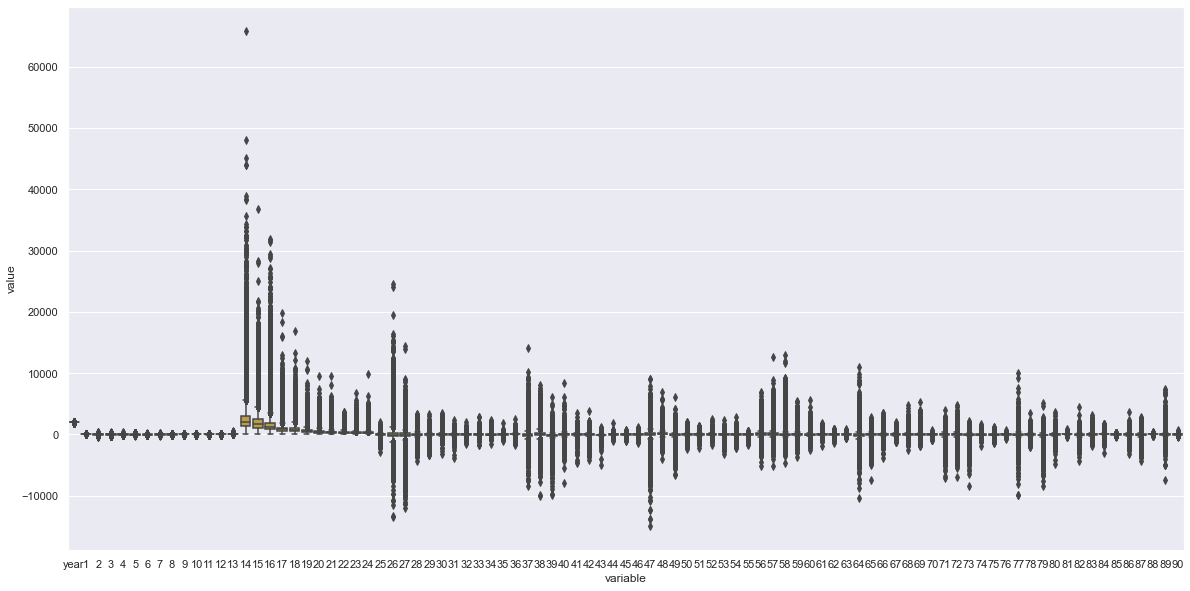

In [17]:
df_melted = pd.melt(df)

sns.set(rc={"figure.figsize":(20, 10)}) #width=3, #height=4
sns.boxplot(x='variable', y='value', data=df_melted);

We can see that there is a great number of major outliers for variables 14 to 90.

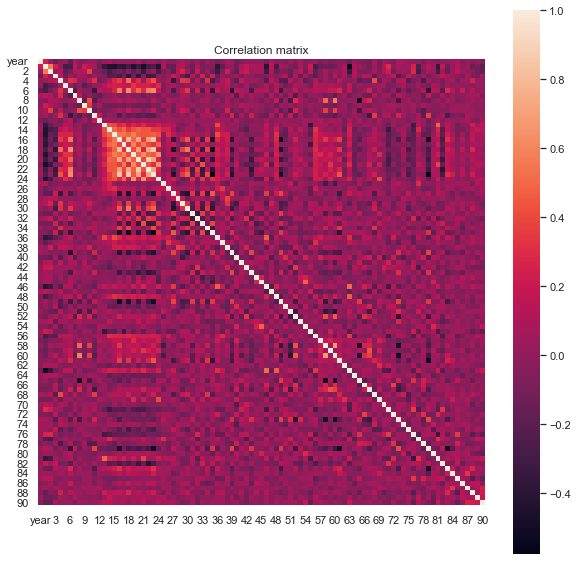

In [18]:
# Correlation between the release year and features
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
plt.title("Correlation matrix")
sns.heatmap(corr, square=True);

We focus on the correlation of the features to the year.

C:\Users\BgTxt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


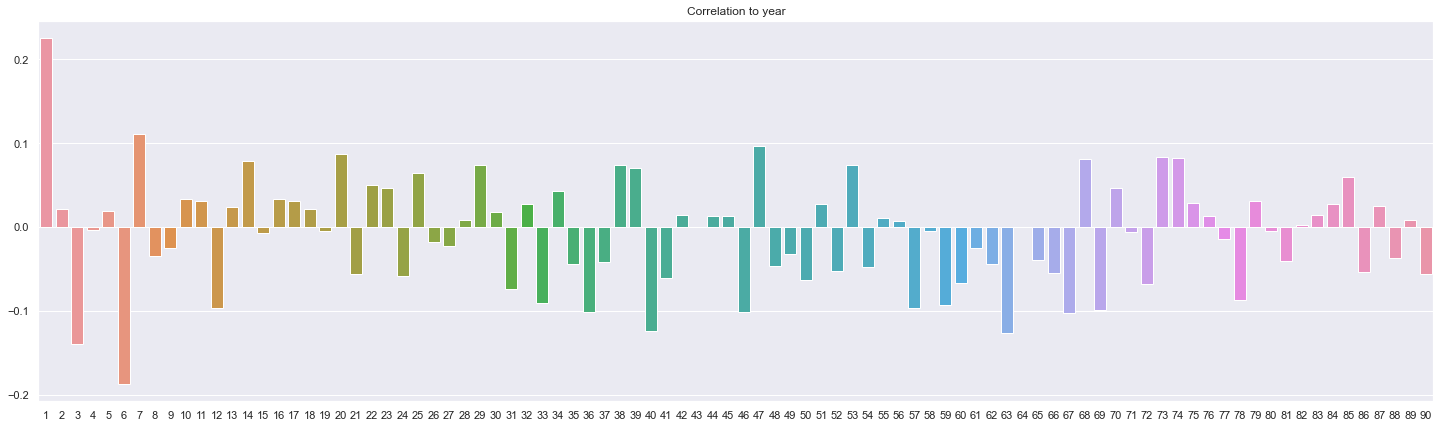

In [19]:
fig, ax = plt.subplots(figsize=(25,7)) 
sns.barplot(corr['year'][1:].index,corr['year'][1:].values)
plt.title('Correlation to year');

## Splitting the data set
We split the data set into a training and a testing data set, before applying any pre-processing of the data,as it would otherwise put information from the testing set into the training set.

We follow the instruction given on the data set page on the UCI Machine Learning Repository and split the data set this way :

train: first 463,715 examples

test: last 51,630 examples

Which according to the website "avoids the 'producer effect' by making sure no song
from a given artist ends up in both the train and test set."

In [9]:
df_train=df.iloc[:463715,:]
print(df_train.shape)
df_test=df.iloc[463715:,:]
print(df_test.shape)

(463715, 91)
(51630, 91)


In [21]:
df_train.describe()

,year,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,...,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000
mean,1998.386095,43.385488,1.261091,8.650195,1.130763,-6.512725,-9.565527,-2.384609,-1.793722,3.714584,...,15.743361,-73.067753,41.423976,37.780868,0.345259,17.599280,-26.364826,4.444985,19.739307,1.323326
std,10.939767,6.079139,51.613473,35.264750,16.334672,22.855820,12.836758,14.580245,7.961876,10.579241,...,32.086356,175.376872,121.794610,94.874474,16.153797,114.336522,174.187892,13.320996,184.843503,22.045404
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-318.223330
25%,1994.000000,39.957540,-26.153810,-11.441920,-8.515155,-20.636960,-18.468705,-10.776340,-6.461400,-2.303600,...,-1.798085,-139.062035,-20.918635,-4.711470,-6.758160,-31.563615,-101.396245,-2.572830,-59.598030,-8.813335
50%,2002.000000,44.262570,8.371550,10.470520,-0.691610,-5.992740,-11.208850,-2.047850,-1.735440,3.816840,...,9.161360,-52.878010,28.709870,33.494550,0.828350,15.554490,-21.123570,3.111120,7.586950,0.052840
75%,2006.000000,47.833650,36.143780,29.741165,8.756995,7.749590,-2.422590,6.515710,2.905130,9.950960,...,26.248290,13.620660,89.419995,77.674700,8.495715,67.743725,52.299850,9.948955,86.203115,9.670740
max,2011.000000,61.970140,384.065730,322.851430,289.527430,262.068870,119.815590,172.402680,105.210280,146.297950,...,840.973380,4469.454870,3210.701700,1672.647100,260.544900,3662.065650,2833.608950,463.419500,7393.398440,600.766240


In [22]:
df_test.describe()

,year,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,...,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000
mean,1998.495758,43.401835,1.545196,8.731564,1.463758,-6.920730,-9.130814,-2.449289,-1.788870,3.847252,...,15.863589,-76.997938,42.606243,39.310543,0.050725,18.297317,-25.870845,4.581295,22.692133,1.381016
std,10.852015,5.962572,51.281696,35.303265,16.212757,22.902284,13.038397,14.496472,7.981406,10.614668,...,32.218761,177.740419,126.057675,96.608422,16.230899,115.244623,172.075713,13.573491,191.839796,22.472760
min,1927.000000,6.697670,-303.172820,-245.410920,-89.217700,-131.846730,-57.980610,-113.116000,-57.871990,-72.142120,...,-246.357820,-3129.093610,-1110.461140,-1744.646510,-219.614190,-1774.001580,-2854.346800,-157.341220,-2506.955030,-381.424430
25%,1995.000000,39.929720,-25.184490,-11.600835,-8.230815,-20.933628,-18.168130,-10.825130,-6.531265,-2.213935,...,-1.941518,-143.866858,-21.597855,-4.348418,-7.012528,-31.828520,-102.875242,-2.515942,-58.742800,-8.882680
50%,2002.000000,44.229145,8.890255,10.548425,-0.319695,-6.123600,-11.018170,-2.038705,-1.746645,3.889485,...,9.279585,-54.900645,29.508960,34.781505,0.757470,16.069910,-21.931495,3.174520,9.395170,0.054950
75%,2006.000000,47.836822,35.981468,29.940652,9.085015,7.680063,-2.122810,6.456940,2.984270,10.051895,...,26.487203,12.322653,91.861593,78.880403,8.278785,68.400735,53.173012,10.117640,87.555310,9.758345
max,2010.000000,60.277240,275.044700,263.002620,335.771820,146.915540,166.236890,83.602670,126.741270,88.007650,...,504.320310,1745.814420,1710.525910,1734.079690,169.214150,2010.117560,2032.431110,244.341800,6946.627670,677.899630


## Scaling
We scale all the features, not the target

In [10]:
# create the scaler 
ss = preprocessing.StandardScaler()

# create new dataframes to keep the non scaled ones
df_train_s=df_train.copy()
df_test_s=df_test.copy()

# we delete df to free space, as we won't need it anymore
del df

# apply the scaler to the dataframe subset 
df_train_s.iloc[:,1:] = ss.fit_transform(df_train_s.iloc[:,1:])
df_test_s.iloc[:,1:] = ss.transform(df_test_s.iloc[:,1:])

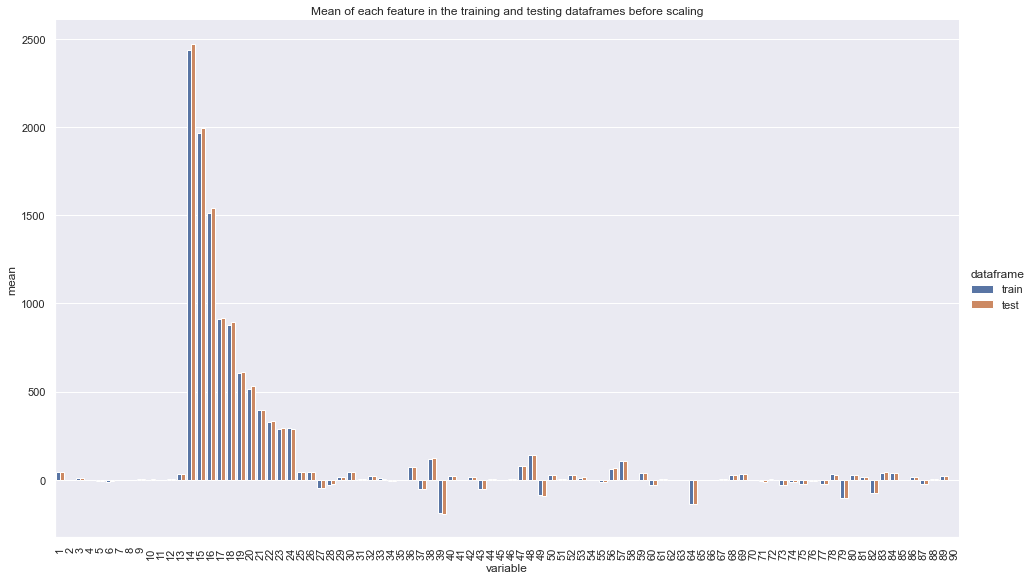

In [24]:
means = pd.DataFrame(list(zip(df_train.columns, df_train.mean(), df_test.mean())),
                   columns=['variable', 'train', 'test'])
means.drop(0, inplace=True)

means = pd.melt(means, id_vars="variable", var_name="dataframe", value_name="mean")

sns.catplot(x='variable', y='mean', hue='dataframe', data=means, kind='bar', height=8, aspect=1.7)
plt.xticks(rotation = 90)
plt.title('Mean of each feature in the training and testing dataframes before scaling');

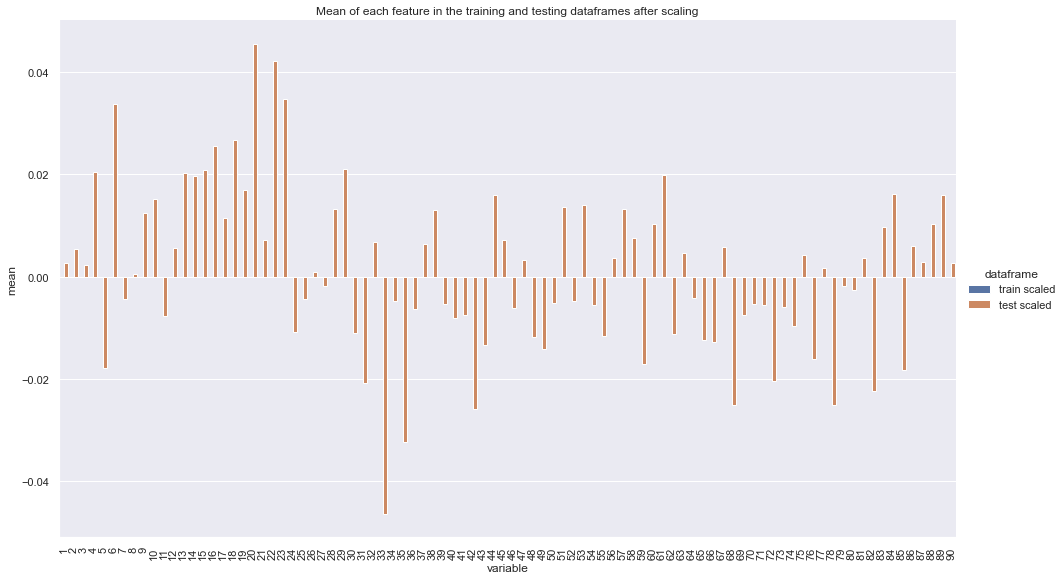

In [25]:
means = pd.DataFrame(list(zip(df_train.columns, df_train_s.mean(), df_test_s.mean())),
                   columns=['variable', 'train scaled', 'test scaled'])
means.drop(0, inplace=True)

means = pd.melt(means, id_vars="variable", var_name="dataframe", value_name="mean")

sns.catplot(x='variable', y='mean', hue='dataframe', data=means, kind='bar', height=8, aspect=1.7)
plt.xticks(rotation = 90)
plt.title('Mean of each feature in the training and testing dataframes after scaling');

We can see that the mean of the scaled dataframes are very close to zero.

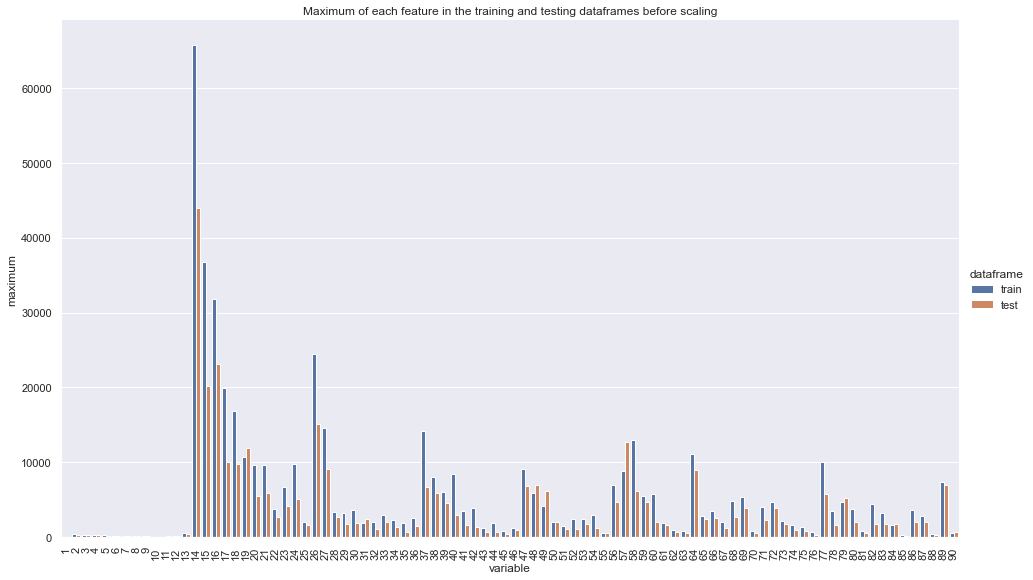

In [26]:
maxi = pd.DataFrame(list(zip(df_train.columns, df_train.max(), df_test.max())),
                   columns=['variable', 'train', 'test'])
maxi.drop(0, inplace=True)

maxi = pd.melt(maxi, id_vars="variable", var_name="dataframe", value_name="maximum")

sns.catplot(x='variable', y='maximum', hue='dataframe', data=maxi, kind='bar', height=8, aspect=1.7)
plt.xticks(rotation = 90)
plt.title('Maximum of each feature in the training and testing dataframes before scaling');

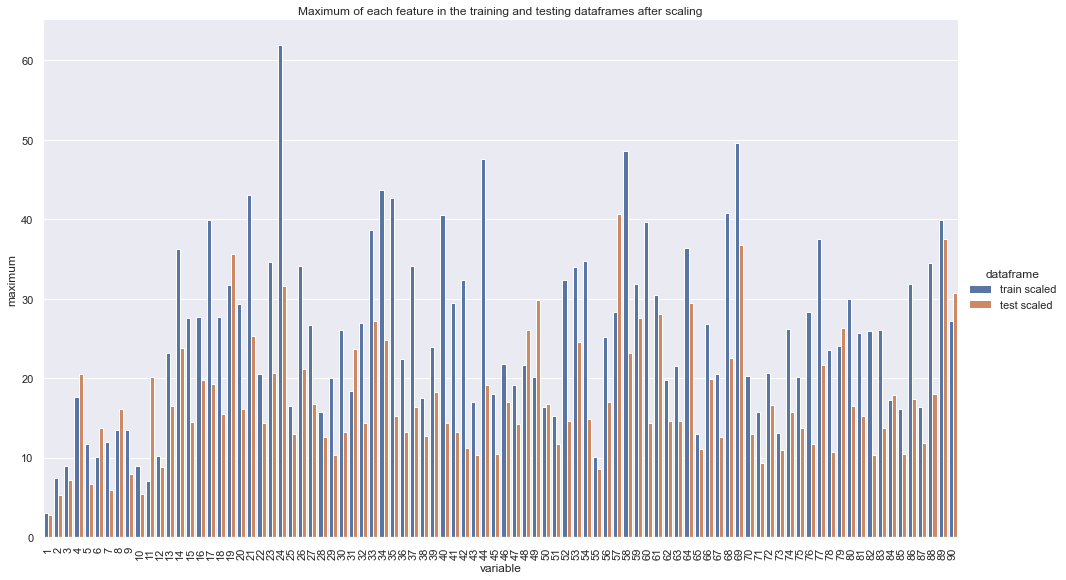

In [27]:
maxi = pd.DataFrame(list(zip(df_train.columns, df_train_s.max(), df_test_s.max())),
                   columns=['variable', 'train scaled', 'test scaled'])
maxi.drop(0, inplace=True)

maxi = pd.melt(maxi, id_vars="variable", var_name="dataframe", value_name="maximum")

sns.catplot(x='variable', y='maximum', hue='dataframe', data=maxi, kind='bar', height=8, aspect=1.7)
plt.xticks(rotation = 90)
plt.title('Maximum of each feature in the training and testing dataframes after scaling');

## Downsampling
In order to avoid the problems that could be caused by the fact that the years between 1980 and 2020 are over represented in our data set, we perform downsampling. We get rid of all songs before the 1950s, and we keep only 1000 songs per year.

In [11]:
df_test_s=df_test_s[df_test_s.year>1949]
df_train_s=df_train_s[df_train_s.year>1949]


#Downsampling by year
min_samples = 1000
years = df_train_s.year.unique()
df_train_sampled = pd.DataFrame(columns=df_train_s.columns)
for Year in years:
    if df_train_s[df_train_s.year==Year].shape[0] > min_samples :
        df_train_sampled = df_train_sampled.append(df_train_s[df_train_s.year==Year].sample(min_samples))
    else :
        df_train_sampled = df_train_sampled.append(df_train_s[df_train_s.year==Year])

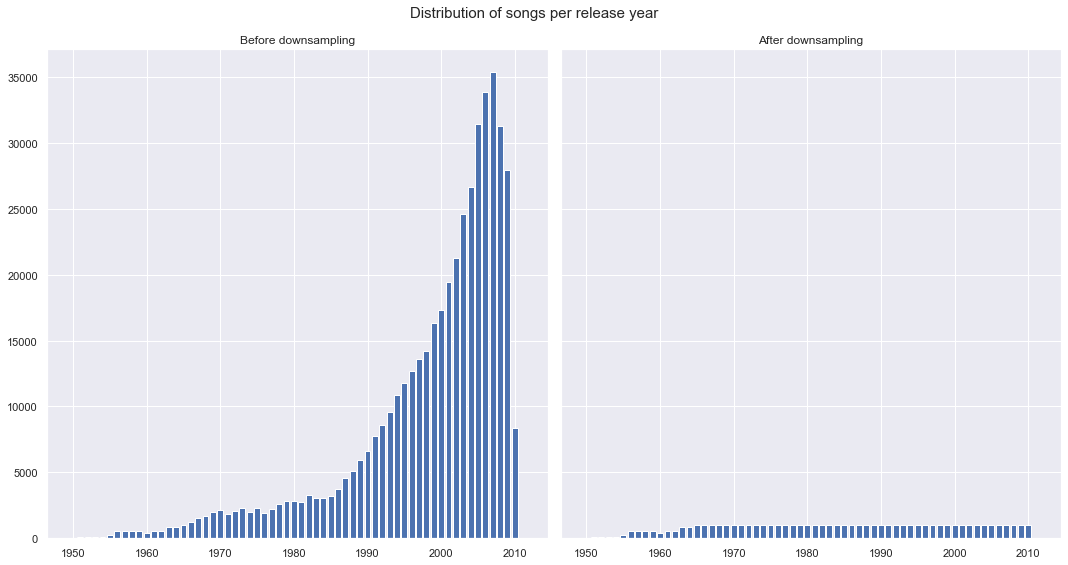

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,8))
fig.suptitle('Distribution of songs per release year', fontsize=15)

ax[0].bar(df_train_s.year.value_counts().index, df_train_s.year.value_counts())
ax[0].set_title('Before downsampling')

ax[1].bar(df_train_s.year.value_counts().index, df_train_sampled.year.value_counts())
ax[1].set_title('After downsampling')

plt.tight_layout()

In [30]:
df_train_s.shape
df_train_sampled.shape

(52041, 91)

We still have 52041 songs in the sampled training dataframe, which is enough to train models.

## Principal Component Analysis (PCA)
We tryed a PCA to reduce the dimensionnality of the data, but unfortunately, maybe because of an error in the PCA, the results were much worse. So we decided not to use these dataframes.

In [ ]:
"""
# Separate target and features
X_test = df_test_s.iloc[:,1:].values
y_test = df_test_s.iloc[:,0].values

X_train = df_train_s.iloc[:,1:].values
y_train = df_train_s.iloc[:,0].values


# Apply PCA
pca_test = decomposition.PCA(n_components=20).fit(X_test)
X_test_pca = pca_test.transform(X_test)
print('X_test.shape : ', X_test.shape, '\nX_test_pca.shape : ', X_test_pca.shape)

pca_train = decomposition.PCA(n_components=20).fit(X_train)
X_train_pca = pca_train.transform(X_train)
print('X_train.shape : ', X_train.shape, '\nX_train_pca.shape : ', X_train_pca.shape)


# Rename columns of the new dataframes
cols = ['year']
for m in range(1, X_train_pca.shape[1]+1):
    cols.append("PrincComp{}".format(m))

    
# We re concatenate X and y
df_test_pca = pd.DataFrame(np.append(y_test.reshape(y_test.shape[0],1), X_test_pca, axis=1), columns=cols)
print('df_test_pca.shape : ', df_test_pca.shape)

df_train_pca = pd.DataFrame(np.append(y_train.reshape(y_train.shape[0],1), X_train_pca, axis=1), columns=cols)
print('df_train_pca.shape : ', df_train_pca.shape)
df_train_pca.head()
"""


## Feature selection
90 features is too much, wo we will try keeping only 10 and only 20 features.

In [12]:
from sklearn.ensemble import ExtraTreesClassifier

# we separate the target from the features
X_train = df_train_s.iloc[:,1:]
y_train = df_train_s.iloc[:,0]

model = ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

<AxesSubplot:>

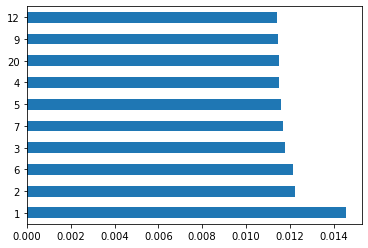

In [13]:
# graph of the 10 most important features
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

<AxesSubplot:>

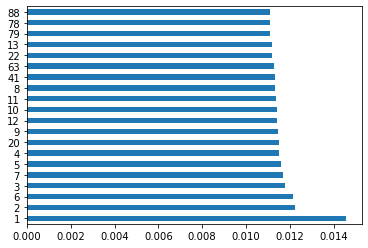

In [14]:
# graph of the 20 most important features
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

We create new dataframes with only the important features.

Names of the target and 10 most important features :

In [15]:
names10=['year']
names10.extend(list(feat_importances.nlargest(10).index.sort_values()))
names10

['year', 1, 2, 3, 4, 5, 6, 7, 9, 12, 20]

Names of the target and 20 most important features :

In [16]:
names20=['year']
names20.extend(list(feat_importances.nlargest(20).index.sort_values()))
names20

['year', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 20, 22, 41, 63, 78, 79, 88]

In [17]:
# Test dataframes scaled and with the target and the 10 most important features
df_test_10ft=df_test_s[names10]

# Test dataframes scaled and with the target and the 20 most important features
df_test_20ft=df_test_s[names20]

# Train dataframe scaled, but not downsampled, with the target and the 10 most important features
df_train_10ft=df_train_s[names10]

# Train dataframe scaled, but not downsampled, with the target and the 20 most important features
df_train_20ft=df_train_s[names20]

# Train dataframe scaled and downsampled, with the target and the 10 most important features
df_train_samp_10ft=df_train_sampled[names10]

# Train dataframe scaled and downsampled, with the target and the 20 most important features
df_train_samp_20ft=df_train_sampled[names20]

In [18]:
df_train_samp_10ft.head()

,year,1,2,3,4,5,6,7,9,12,20
77072,2001,0.260896,-0.073311,0.085525,-0.917609,0.334441,0.672310,-0.793876,-0.171108,1.715129,-0.741846
176145,2001,0.057681,-0.655843,0.264248,-0.439847,-0.536880,0.173953,-0.936651,1.042392,0.656571,-0.197511
339069,2001,-0.123751,-1.497238,1.684602,-0.409320,-0.476092,-0.346435,-0.430945,1.099777,0.837246,-0.760485
361296,2001,1.138253,0.672390,0.128324,0.188384,-1.003093,0.647410,0.439112,-1.097399,0.594201,-0.699917
162755,2001,-1.600833,0.288289,-1.180313,1.853276,1.828164,3.095950,-1.554656,0.843844,-1.106499,3.935019


In [19]:
df_train_samp_20ft.head()

,year,1,2,3,4,5,6,7,8,9,...,11,12,13,20,22,41,63,78,79,88
77072,2001,0.260896,-0.073311,0.085525,-0.917609,0.334441,0.672310,-0.793876,0.236093,-0.171108,...,-0.748002,1.715129,-0.736157,-0.741846,-0.768032,-0.214410,0.545608,0.822974,-0.811647,-1.608805
176145,2001,0.057681,-0.655843,0.264248,-0.439847,-0.536880,0.173953,-0.936651,-0.995981,1.042392,...,0.391309,0.656571,0.357106,-0.197511,-0.311754,0.475249,1.310297,0.359010,0.601264,-0.310472
339069,2001,-0.123751,-1.497238,1.684602,-0.409320,-0.476092,-0.346435,-0.430945,-0.205649,1.099777,...,0.390441,0.837246,-0.138187,-0.760485,-1.032753,-0.625993,0.102976,-0.500732,-0.463366,0.515578
361296,2001,1.138253,0.672390,0.128324,0.188384,-1.003093,0.647410,0.439112,0.100975,-1.097399,...,0.173518,0.594201,-0.866720,-0.699917,-0.737872,-0.654139,-0.688973,0.218691,-0.286088,0.058592
162755,2001,-1.600833,0.288289,-1.180313,1.853276,1.828164,3.095950,-1.554656,1.400687,0.843844,...,-3.667137,-1.106499,4.790689,3.935019,3.343852,-5.599524,2.039406,1.170872,-1.119184,7.092914


## Modelling

### Metrics :

We create a function that will return a tuple of several metrics.

In [21]:
def metric(modelName, y_test, y_pred):
    explained_variance=metrics.explained_variance_score(y_test, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred) 
    mse=metrics.mean_squared_error(y_test, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_test, y_pred)
    r2=metrics.r2_score(y_test, y_pred)
    r2_adj = 1-((1-r2)* (len(y_test)-1)/(len(y_test)-91))
    rmse = np.sqrt(mse) 
    return (modelName, explained_variance, mean_absolute_error, mse, rmse, r2, r2_adj)

We create a dataframe that we will fill with the metrics of each model we try.

In [22]:
df_metrics = pd.DataFrame(columns=['Model','ExplainedVariance', 'MeanAbsoluteError', 'MeanSquaredError', 'RootMeanSquaredError', 'R^2','R^2adjusted'])
df_metrics

,Model,ExplainedVariance,MeanAbsoluteError,MeanSquaredError,RootMeanSquaredError,R^2,R^2adjusted


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, \
GradientBoostingRegressor, RandomForestRegressor

model_names = [LinearRegression(), AdaBoostRegressor(), BaggingRegressor(), ExtraTreesRegressor(),
               GradientBoostingRegressor(), RandomForestRegressor()]

datasets = [(df_test_10ft, df_train_10ft), (df_test_10ft, df_train_samp_10ft),
            (df_test_20ft, df_train_20ft), (df_test_20ft, df_train_samp_20ft) ] 
    
list_preds = []

for model in model_names :
    # we start by getting the dataframes names
    for (test, train) in datasets :
        if test.shape[1]  == df_test_10ft.shape[1] :
            nametest = 'test10ft'
            
            if train.shape[0] == df_train_10ft.shape[0] :
                nametrain = 'train10ft'
            else :
                nametrain = 'trainsamp10ft'
            
        else :
            nametest = 'test20ft'
            
            if train.shape[0] == df_train_20ft.shape[0] :
                nametrain = 'train20ft'
            else :
                nametrain = 'trainsamp20ft'
            
        
            
        
        mod = model.fit(train.iloc[:,1:],train.iloc[:,0])
    
        y_pred = np.round(mod.predict(test.iloc[:,1:]),0)
        
        name = str(model)+' ; '+nametest+' ; '+nametrain
        df_metrics = df_metrics.append(dict(zip(df_metrics.columns, metric(name,
                                                                           test.iloc[:,0], y_pred))), ignore_index=True)
        
        list_preds.append((name, y_pred))
        

### Metrics results

In [50]:
df_metrics

,Model,ExplainedVariance,MeanAbsoluteError,MeanSquaredError,RootMeanSquaredError,R^2,R^2adjusted
0,LinearRegression() ; test10ft ; train10ft,0.153845,7.066032,94.155367,9.703369,0.153787,0.152306
1,LinearRegression() ; test10ft ; trainsamp10ft,-0.028878,13.232304,235.073851,15.332118,-1.112706,-1.116402
2,LinearRegression() ; test20ft ; train20ft,0.180753,6.915865,91.161091,9.547832,0.180697,0.179264
3,LinearRegression() ; test20ft ; trainsamp20ft,-0.009589,12.853617,224.654339,14.988474,-1.019062,-1.022594
4,AdaBoostRegressor() ; test10ft ; train10ft,0.109437,9.313218,122.358080,11.061559,-0.099683,-0.101607
5,AdaBoostRegressor() ; test10ft ; trainsamp10ft,0.098540,14.720312,263.573269,16.234940,-1.368842,-1.372986
6,AdaBoostRegressor() ; test20ft ; train20ft,0.111932,9.853753,132.181058,11.497002,-0.187966,-0.190044
7,AdaBoostRegressor() ; test20ft ; trainsamp20ft,0.106684,14.688082,261.095603,16.158453,-1.346574,-1.350680
8,BaggingRegressor() ; test10ft ; train10ft,0.132678,7.097117,96.758363,9.836583,0.130392,0.128871
9,BaggingRegressor() ; test10ft ; trainsamp10ft,-0.133459,12.024100,218.010556,14.765181,-0.959351,-0.962779


In [58]:
df_metrics.sort_values("MeanAbsoluteError")

,Model,ExplainedVariance,MeanAbsoluteError,MeanSquaredError,RootMeanSquaredError,R^2,R^2adjusted
14,ExtraTreesRegressor() ; test20ft ; train20ft,0.257864,6.562384,82.853986,9.102416,0.255357,0.254054
22,RandomForestRegressor() ; test20ft ; train20ft,0.245743,6.583476,84.165438,9.174172,0.243570,0.242247
18,GradientBoostingRegressor() ; test20ft ; train...,0.231764,6.642910,85.489891,9.246074,0.231667,0.230323
16,GradientBoostingRegressor() ; test10ft ; train...,0.208792,6.751067,88.044610,9.383209,0.208707,0.207322
12,ExtraTreesRegressor() ; test10ft ; train10ft,0.216441,6.756772,87.467149,9.352387,0.213896,0.212521
20,RandomForestRegressor() ; test10ft ; train10ft,0.207035,6.769229,88.475415,9.406137,0.204835,0.203444
10,BaggingRegressor() ; test20ft ; train20ft,0.174409,6.901467,92.105751,9.597174,0.172207,0.170759
2,LinearRegression() ; test20ft ; train20ft,0.180753,6.915865,91.161091,9.547832,0.180697,0.179264
0,LinearRegression() ; test10ft ; train10ft,0.153845,7.066032,94.155367,9.703369,0.153787,0.152306
8,BaggingRegressor() ; test10ft ; train10ft,0.132678,7.097117,96.758363,9.836583,0.130392,0.128871


Comparing MAE and RMSE of each model :

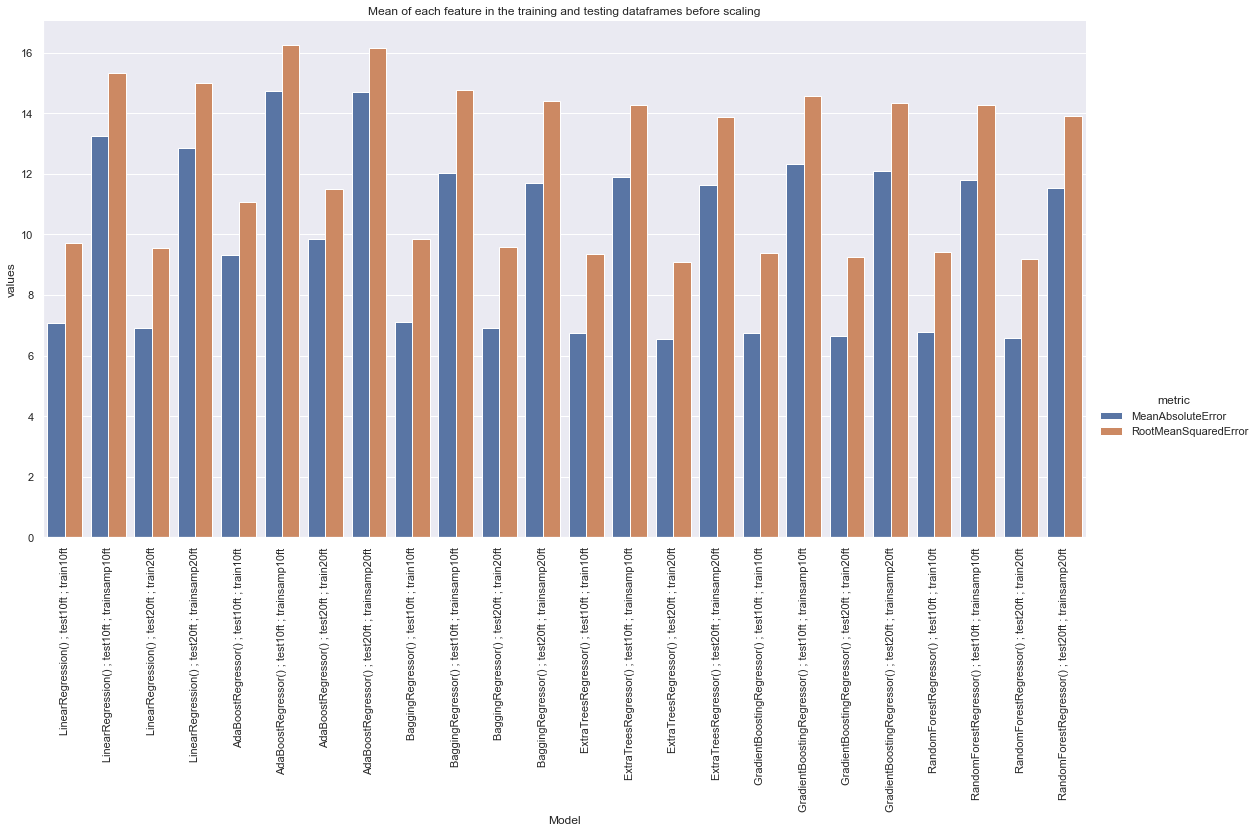

In [51]:
compare = pd.melt(df_metrics[['Model', 'MeanAbsoluteError', 'RootMeanSquaredError']], id_vars="Model", var_name="metric", value_name="values")
sns.catplot(x='Model', y='values', hue='metric', data=compare, kind='bar', height=8, aspect=2)
plt.xticks(rotation = 90)
plt.title('Mean of each feature in the training and testing dataframes before scaling');

The model with the lowest Mean Absolute Error, MSE and RMSE is the Extra-trees Regression. It also has the highest adjusted R². So it is the best model among all of those tested.

### Graphs

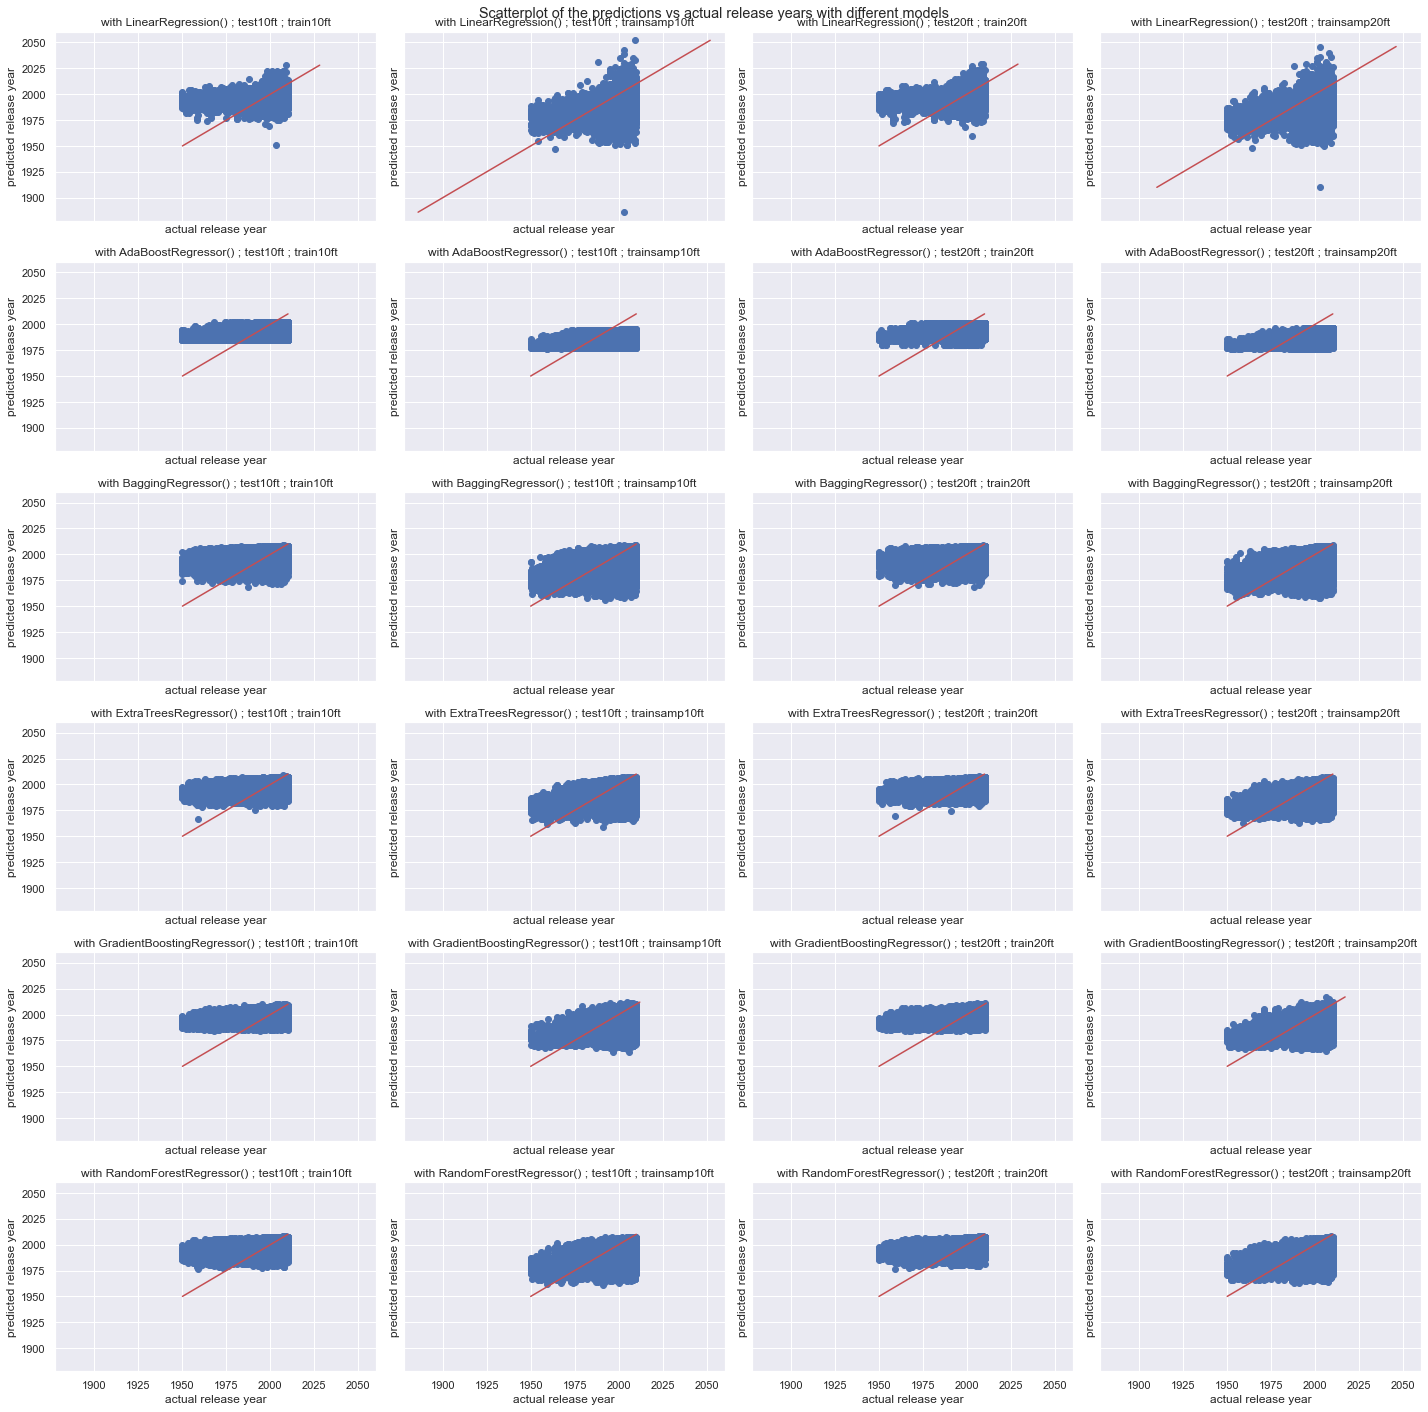

In [52]:
y_test = df_test_10ft.iloc[:,0]

# Scatterplots
fig, ax = plt.subplots(nrows=6, ncols=4, sharex=True, sharey=True, figsize=(20,20))
plt.suptitle('Scatterplot of the predictions vs actual release years with different models');

c = 0

for name, y_pred in list_preds :
    i = c//4
    j = c%4

    ax[i,j].scatter(y_test, y_pred)
    ax[i,j].set_xlabel('actual release year')
    ax[i,j].set_ylabel('predicted release year')

    lineStart = min(y_test.min(), y_pred.min())
    lineEnd = max(y_test.max(), y_pred.max()) 
    ax[i,j].plot([lineStart, lineEnd], [lineStart, lineEnd], '-', color = 'r', label = 'y=x')
    ax[i,j].set_title('with '+name);
    
    c += 1

    

plt.tight_layout()

In [54]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

C:\Users\BgTxt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\BgTxt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\BgTxt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

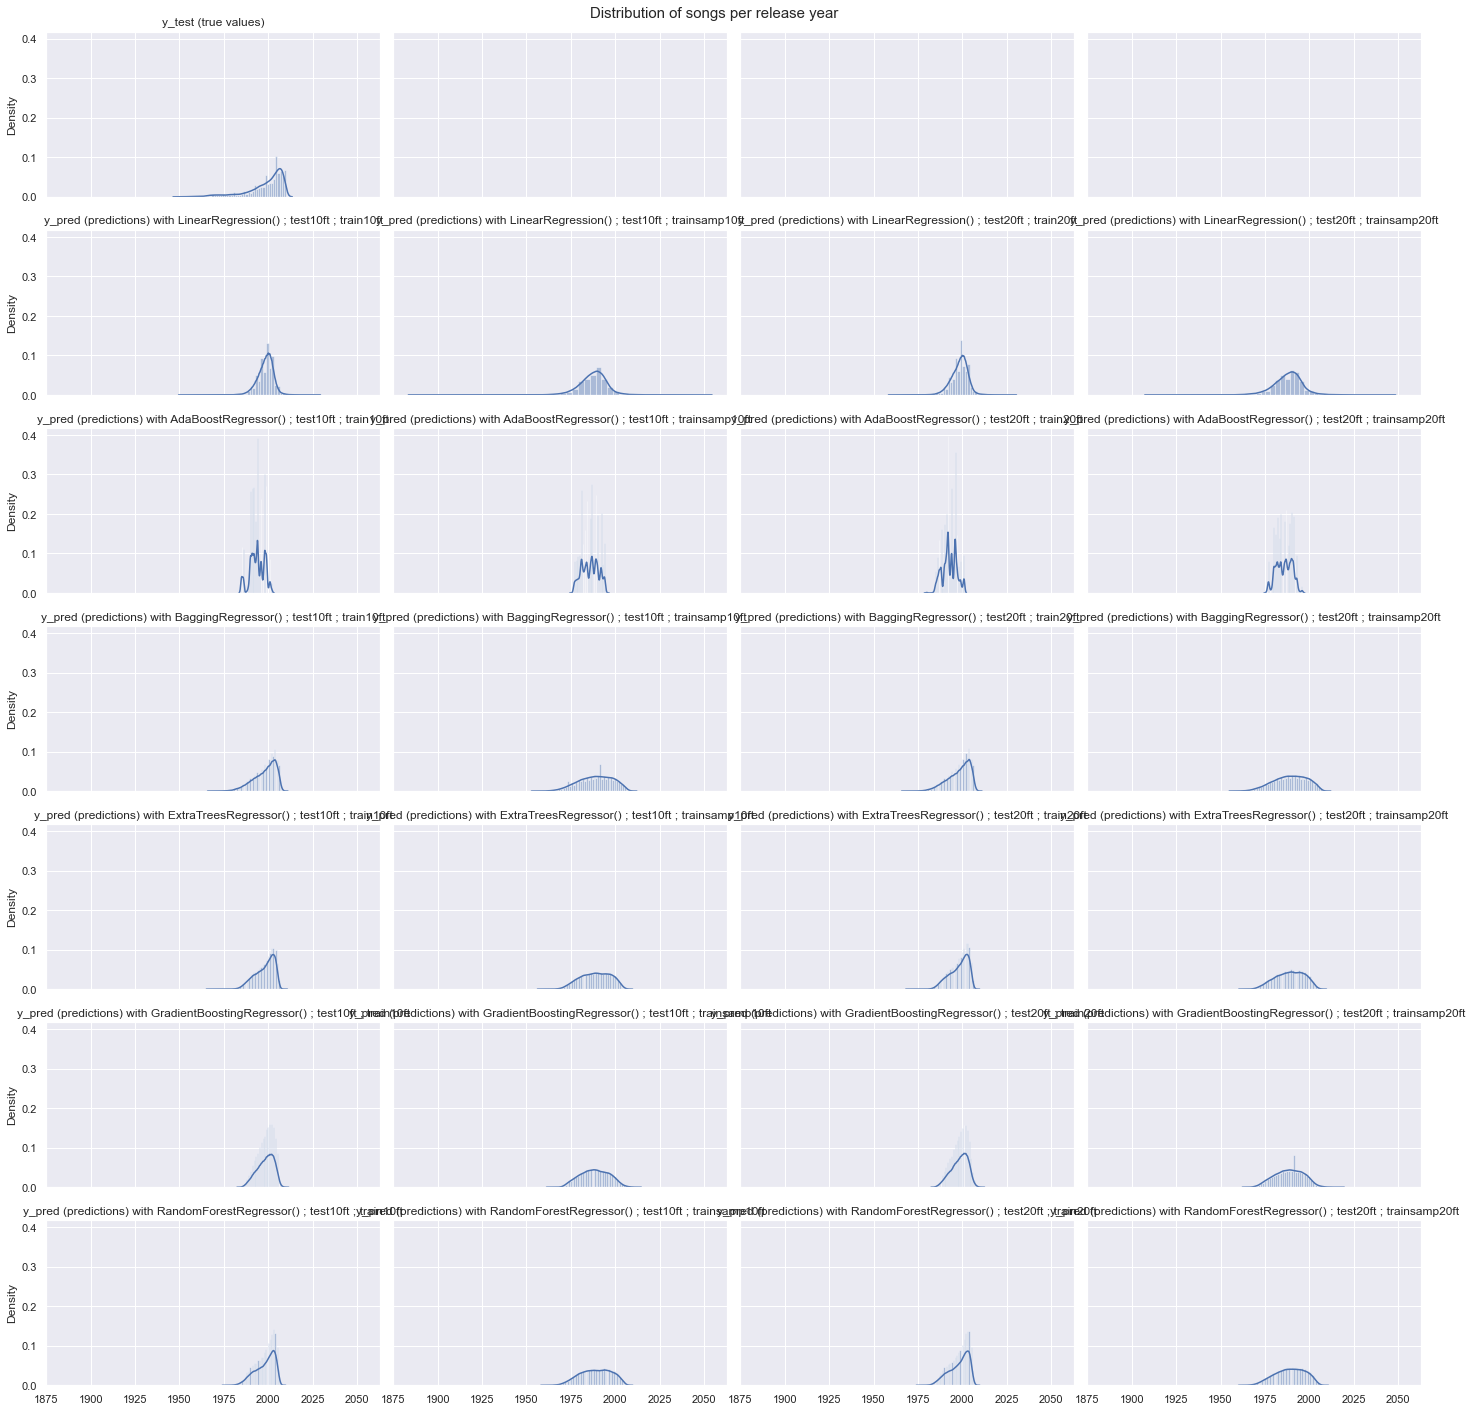

In [55]:
# Histogram
fig, ax = plt.subplots(nrows=7, ncols=4, sharex=True, sharey=True, figsize=(20,20))
plt.suptitle('Distribution of songs per release year', fontsize=15);

sns.distplot(y_test, hist=True, kde=True, ax=ax[0,0])
ax[0,0].set_title('y_test (true values)')

c = 4

for name, y_pred in list_preds :
    i = c//4
    j = c%4

    sns.distplot(y_pred, hist=True, kde=True, ax=ax[i,j]);
    ax[i,j].set_title('y_pred (predictions) with '+name)

    c += 1

    
plt.tight_layout()



## Conclusion
We can see that the model with the best Root Mean Squared Error is ExtraTreesRegressor, with the sets of 20 features, and the training set not downsampled. 

But to have a model small enough to load in a reasonnable time, and not to many features for the user to enter in the API, we decided to keep the best model with data sets of 10 features. It was the ExtraTreesRegressor, with the sets of 10 features, and the training set not downsampled. Unfortunately we got a memory error.

So we kept the second best model with data sets of 10 features, which was the GradientBoostingRegressor, with the sets of 10 features, and the training set not downsampled. It has a RMSE of 9,38.

## API
The following code is to save the model for the API.

In [44]:
from sklearn.ensemble import  ExtraTreesRegressor,GradientBoostingRegressor
model=GradientBoostingRegressor().fit(df_train_10ft.iloc[:,1:],df_train_10ft.iloc[:,0])

In [25]:
import pickle

In [45]:
pickle.dump(model, open('model.pkl','wb'))